In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re

In [77]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')
train_data=train_dataset.copy()
test_data=test_dataset.copy()
train_label=train_data.pop('Survived')

In [78]:
print(test_data.shape)
print(train_data.shape)

(418, 11)
(891, 11)


In [79]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
def dropping_cols(data):
    data=data.drop(['Name','Ticket','Cabin'],axis=1)
    return data
train_data=dropping_cols(train_data)
test_data=dropping_cols(test_data)

In [81]:
def removingNaN(data):
    data['Age']=data['Age'].fillna(data['Age'].mean())
    data['Fare']=data['Fare'].fillna(data['Fare'].mean())
    data['Embarked']=data['Embarked'].fillna('S')
    return data
train_data=removingNaN(train_data)
test_data=removingNaN(test_data)

In [82]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [83]:
train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [84]:
def one_hot(data):
    data=pd.get_dummies(data)
    return data
train_data=one_hot(train_data)
test_data=one_hot(test_data)

In [85]:
train_data_id=train_data.pop('PassengerId')
test_data_id=test_data.pop('PassengerId')

In [86]:
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [94]:
from sklearn.preprocessing import StandardScaler
def norm_data(data):
    data=StandardScaler().fit_transform(data)
    return data
normed_train_data=norm_data(train_data)
normed_test_data=norm_data(test_data)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation='relu',input_shape=[10]),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [95]:
history=model.fit(normed_train_data,train_label,epochs=100,validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 1ms/sample - loss: 0.6098 - accuracy: 0.7008 - val_loss: 0.4765 - val_accuracy: 0.8324
Epoch 2/100
712/712 [==============================] - 0s 141us/sample - loss: 0.4768 - accuracy: 0.7893 - val_loss: 0.3952 - val_accuracy: 0.8324
Epoch 3/100
712/712 [==============================] - 0s 136us/sample - loss: 0.4576 - accuracy: 0.7907 - val_loss: 0.3801 - val_accuracy: 0.8324
Epoch 4/100
712/712 [==============================] - 0s 112us/sample - loss: 0.4499 - accuracy: 0.8076 - val_loss: 0.3762 - val_accuracy: 0.8436
Epoch 5/100
712/712 [==============================] - 0s 127us/sample - loss: 0.4437 - accuracy: 0.8076 - val_loss: 0.3696 - val_accuracy: 0.8492
Epoch 6/100
712/712 [==============================] - 0s 120us/sample - loss: 0.4390 - accuracy: 0.8062 - val_loss: 0.3654 - val_accuracy: 0.8659
Epoch 7/100
712/712 [==============================] - 0s 120us/sample - l

712/712 [==============================] - 0s 121us/sample - loss: 0.3905 - accuracy: 0.8258 - val_loss: 0.3353 - val_accuracy: 0.8827
Epoch 57/100
712/712 [==============================] - 0s 144us/sample - loss: 0.3910 - accuracy: 0.8272 - val_loss: 0.3313 - val_accuracy: 0.8771
Epoch 58/100
712/712 [==============================] - 0s 161us/sample - loss: 0.3812 - accuracy: 0.8427 - val_loss: 0.3286 - val_accuracy: 0.8771
Epoch 59/100
712/712 [==============================] - 0s 106us/sample - loss: 0.3836 - accuracy: 0.8357 - val_loss: 0.3345 - val_accuracy: 0.8771
Epoch 60/100
712/712 [==============================] - 0s 150us/sample - loss: 0.3786 - accuracy: 0.8357 - val_loss: 0.3268 - val_accuracy: 0.8771
Epoch 61/100
712/712 [==============================] - 0s 115us/sample - loss: 0.3960 - accuracy: 0.8343 - val_loss: 0.3352 - val_accuracy: 0.8771
Epoch 62/100
712/712 [==============================] - 0s 127us/sample - loss: 0.3995 - accuracy: 0.8357 - val_loss: 0.3277 

In [96]:
predictions=model.predict(normed_test_data)

survived=[]
for i in predictions:
    if i>0.5:
        survived.append(1)
    else:
        survived.append(0)
survived=np.array(survived)

df=pd.DataFrame()
df['PassengerId']=test_data_id
df['Survived']=survived
df.to_csv('mypredictions.csv',index=False)

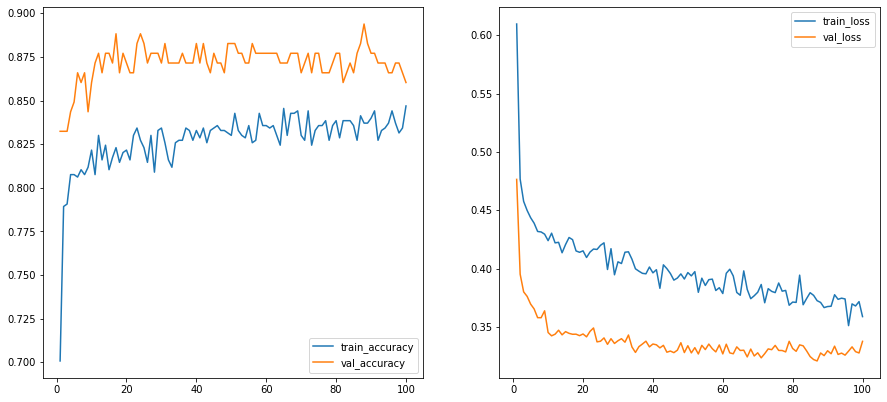

In [97]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_acc)+1)

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.plot(epochs,train_acc,label='train_accuracy')
plt.plot(epochs,val_acc,label='val_accuracy')
plt.legend()

plt.subplot(222)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.legend()